In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
import warnings
warnings.filterwarnings('ignore')

In [245]:
data=pd.read_csv('Glass Identification.csv')

In [246]:
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [247]:
columns = [
    "Id number", "RI", "Na", "Mg", "Al", "Si", 
    "K", "Ca", "Ba", "Fe", "Type of glass"
]

In [248]:
row_1=data.columns
data.columns=columns

In [249]:
data = pd.DataFrame([row_1], columns=data.columns).append(data, ignore_index=True)


In [250]:
data.loc[0,'Type of glass']=1

In [251]:
data.loc[0,'Fe']=0.1

In [252]:
data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.1,1
1,2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [253]:
data.drop(columns=['Id number'],axis=1,inplace=True)

In [254]:
data=data.drop_duplicates()

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RI             213 non-null    object
 1   Na             213 non-null    object
 2   Mg             213 non-null    object
 3   Al             213 non-null    object
 4   Si             213 non-null    object
 5   K              213 non-null    object
 6   Ca             213 non-null    object
 7   Ba             213 non-null    object
 8   Fe             213 non-null    object
 9   Type of glass  213 non-null    object
dtypes: object(10)
memory usage: 18.3+ KB


In [256]:
data = data.astype(float)


In [257]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057746,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097553,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [258]:
data.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

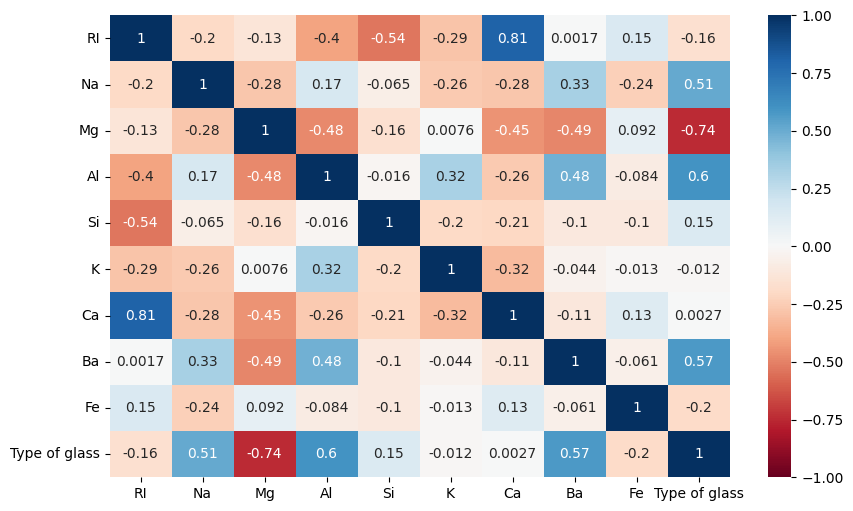

In [259]:
plt.figure(figsize=(10,6))

df_corr = data.corr()
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1,annot=True)
plt.show()

In [260]:
data['Type of glass'].astype(object)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    7.0
210    7.0
211    7.0
212    7.0
213    7.0
Name: Type of glass, Length: 213, dtype: object

In [261]:
data=data.drop(['K','Ca'],axis=1)

In [262]:
cols=data.columns

In [263]:
# co - relation matrix table
corr=data.corr()
corr

,RI,Na,Mg,Al,Si,Ba,Fe,Type of glass
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,0.001679,0.151382,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,0.329080,-0.238066,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,-0.491818,0.091522,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.480642,-0.084021,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.104389,-0.103220,0.147725
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,1.000000,-0.061458,0.574896
Fe,0.151382,-0.238066,0.091522,-0.084021,-0.103220,-0.061458,1.000000,-0.195270
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,0.574896,-0.195270,1.000000


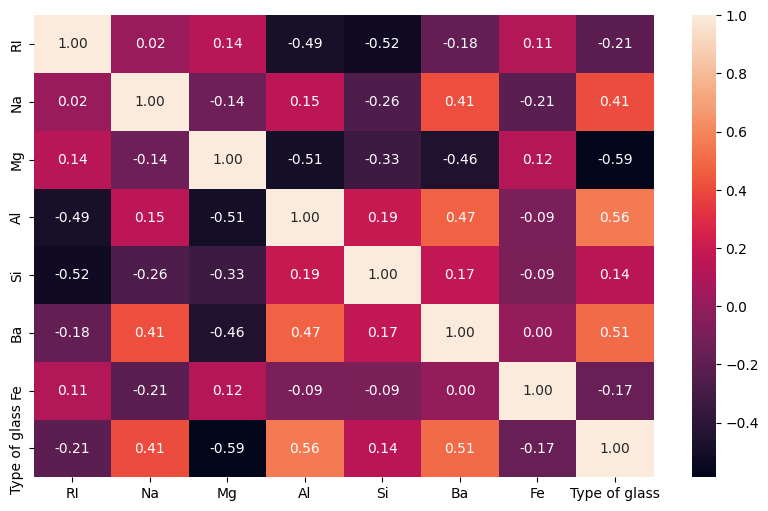

In [264]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data=data.corr(method='spearman'), annot=True, fmt='.2f')


In [265]:
X = data.drop('Type of glass', axis = 1)
y = data['Type of glass']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

In [266]:
from sklearn.preprocessing import MinMaxScaler

column_names = X_train.columns


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [267]:
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = pd.DataFrame(X_test, columns=column_names)

## Taining a Model

In [268]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation_fn(best_model, X_test, Y_test):
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)


In [269]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, Y_train)

evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.7674418604651163
Precision of the model is: 0.8041278526914641
Recall of the model is: 0.7674418604651163
F1 score of the model is: 0.7772374911909797


In [270]:
model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, Y_train)

evaluation_fn(model_rf,X_test,Y_test)

Accuracy of the model is: 0.813953488372093
Precision of the model is: 0.729031882030658
Recall of the model is: 0.813953488372093
F1 score of the model is: 0.7666876178504086


In [271]:
model_xg = XGBRFClassifier(random_state=42)

model_xg.fit(X_train, Y_train)

evaluation_fn(model_xg,X_test,Y_test)

[15:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the model is: 0.6976744186046512
Precision of the model is: 0.6382059800664451
Recall of the model is: 0.6976744186046512
F1 score of the model is: 0.6630036630036631


In [272]:
# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=17)
param_grid_rf = {
    'n_estimators': [60,80,100, 120,150,200,220,250],
    'max_depth': [6,7,8,10,12],
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, Y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Random Forest Classifier:")
evaluation_fn(best_rf_model, X_test, Y_test)

Random Forest Classifier:
Accuracy of the model is: 0.813953488372093
Precision of the model is: 0.724630021141649
Recall of the model is: 0.813953488372093
F1 score of the model is: 0.7653185035389282


In [273]:
params=best_rf_model.get_params()

In [274]:
# Built-in feature importance (Gini Importance)
importances = best_rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': cols[:-1], 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

  Feature  Gini Importance
2      Mg         0.221464
3      Al         0.193407
0      RI         0.183225
1      Na         0.150241
4      Si         0.103916
5      Ba         0.099542
6      Fe         0.048204


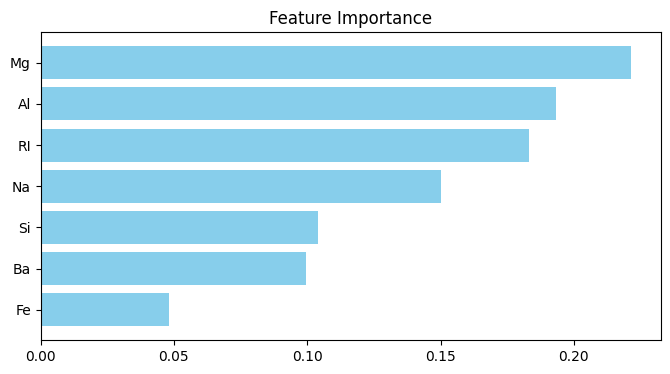

In [275]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

In [276]:
# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(**params)

rf_model.fit(X_train, Y_train)
print("Random Forest Classifier:")
evaluation_fn(rf_model, X_test, Y_test)

Random Forest Classifier:
Accuracy of the model is: 0.813953488372093
Precision of the model is: 0.724630021141649
Recall of the model is: 0.813953488372093
F1 score of the model is: 0.7653185035389282


## finally the rf model is best for Glass Identification 